# Hybrid Lagrangian bias expansion with baryons
### - Apply bcm and compare the 15 operators of the lbias model -

Project idea:
- apply bcm to a simulation
- measure 15 terms of lbias before and after baryonification
- does bcm change mostly $P_{11}$ or all terms?
- create galaxy mock catalogue
- can $b_{\nabla}$ absorb all baryon effects? or we need to use the baryonified $P_{11}$? or all baryonified terms?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bacco

/scratch/mzennaro/miniconda3/envs/mcnd/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Load sim

In [2]:
basedir = '/dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/'
halo_file = 'groups_000/fof_subhalo_history_tab_orph_wweight_000'
atarget = 1
sim = bacco.Simulation(basedir=basedir, halo_file=halo_file, closest_expfactor=atarget)
print(sim.Cosmology)

2024-02-03 23:29:33,196 bacco.sims : Initialising simulation Default
2024-02-03 23:29:33,197 bacco.sims : try /dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/groups_081/fof_subhalo_history_tab_orph_wweight_081
2024-02-03 23:29:33,222 bacco.sims : Loading /dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/groups_081/fof_subhalo_history_tab_orph_wweight_081
2024-02-03 23:29:33,251 bacco.cosmo :    initialization took 0.000 secs
2024-02-03 23:29:33,353 bacco.sims : ...done in 0.0591 s


-----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------


# Baryonify sim

After this we have a DMO sim and a BCM sim

In [3]:
bcmsim = bacco.Baryons(sim, sim.Cosmology,
                       M_c=1.2e14, eta=0.5, beta=0.6,
                       M1_z0_cen=1.526e11, epsilon_z0_cen=0.023, alpha_z0_cen=-1.779, gamma_z0_cen=0.547, delta_z0_cen=4.394,
                       M1_fsat=1.59, epsilon_fsat=1.56, alpha_fsat=0.16, gamma_fsat=1.67, delta_fsat=0.99,
                       M_r = 1e16, beta_r=2., sigma_r=0.1, mu_r =0.3, eject_model='A',
                       theta_inn = 0.1, M_inn= 2.3e13, mu_inn=0.31, theta_out = 1.1, R_h = 0.015, alpha_g = 2.,
                       displace_dm=False, displace_sdm=True, component_props=[], single_component=None, mode ='truncated', ParticlesRadius = 1.,
                       bin=(0.01,90.,100), logger_level=None,  halo_mass_range=(1e2,1e6), nthreads = None,
                       halos=None, use_cbaryon=True, alpha_agn = 1., T_agn=1e5, m_agn=0.7, T_field=1e6,
                       A_nth=0.495, bound_model='powerlaw', tag='standardAGN'
                      )

2024-02-03 23:29:33,559 bacco.sims : Reading 1945855 items for Group_M_Crit200
2024-02-03 23:29:33,825 bacco.sims : Reading 1945855 items for Group_M_Crit200
2024-02-03 23:29:34,073 bacco.sims : Reconstructing sDM
2024-02-03 23:29:34,074 bacco.sims : Reading 3526917 items for sDM/ih_pos
2024-02-03 23:29:34,266 bacco.sims : Reading 1945855 items for GroupPos
2024-02-03 23:29:34,395 bacco.sims : Reading 3526917 items for sDM/ih_vel
2024-02-03 23:29:34,589 bacco.sims : Reading 1945855 items for GroupVel
2024-02-03 23:29:34,720 bacco.sims : Reading 3526917 items for sDM/offset
2024-02-03 23:29:35,051 bacco.sims : Reading 3526917 items for sDM/pos
2024-02-03 23:29:35,313 bacco.sims : Reading 3526917 items for sDM/vel
2024-02-03 23:29:35,588 bacco.sims : Reading 3526917 items for sDM/ih_ids
2024-02-03 23:29:35,768 bacco.sims : Reading 3526917 items for sDM/ids
2024-02-03 23:29:36,002 bacco.sims : Done reconstructing sDM
2024-02-03 23:29:36,003 bacco.baryons : computing baryon profiles and ap

0

2024-02-03 23:29:37,788 bacco.baryons : displacement for 29410 halos computed and applied in 1.79 seconds
2024-02-03 23:29:37,789 bacco.baryons : 
 -------   BCM   --------- 
 
2024-02-03 23:29:37,790 bacco.baryons : Time to create the Baryon Simulation: 4.4 seconds
2024-02-03 23:29:37,791 bacco.baryons : Memory used to create the Baryon Simulation: 722.86208 Megabytes


In [4]:
ngrid = 512
kmin = 2*np.pi/sim.header['BoxSize']
kmax = np.pi*ngrid/sim.header['BoxSize']
log_binning = False
nbins = 80 if log_binning else int((kmax - kmin) / kmin)

log_binning_kmax = kmax
min_k = kmin
log_binning_nbins = nbins

pkdict = {
    'kmin': kmin,
    'kmax': kmax,
    'ngrid': ngrid,
    'log_binning': log_binning,
    'nbins': nbins
}

bacco.configuration.update({'pknbody': {'ngrid': ngrid}})
bacco.configuration.update({'pknbody': {'log_binning': log_binning}})
bacco.configuration.update({'pknbody': {'min_k': min_k}})
bacco.configuration.update({'pknbody': {'log_binning_kmax': log_binning_kmax}})
bacco.configuration.update({'pknbody': {'log_binning_nbins': log_binning_nbins}})

print(bacco.config['pknbody'])

{'ngrid': 512, 'interlacing': True, 'log_binning': False, 'log_binning_kmax': 6.283185307179586, 'log_binning_nbins': 255, 'min_k': 0.02454369260617026, 'depmethod': 'tsc', 'correct_grid': True, 'folds': 1.0}


In [5]:
dmopk = sim.get_sdmPower(**pkdict)

2024-02-03 23:29:37,817 bacco.sims : Computing sdm-P(k)
2024-02-03 23:29:37,818 bacco.sims : Reconstructing sDM
2024-02-03 23:29:37,896 bacco.sims : Reading 3526917 items for sDM/ih_pos
2024-02-03 23:29:38,092 bacco.sims : Reading 1945855 items for GroupPos
2024-02-03 23:29:38,262 bacco.sims : Reading 3526917 items for sDM/ih_vel
2024-02-03 23:29:38,429 bacco.sims : Reading 1945855 items for GroupVel
2024-02-03 23:29:38,575 bacco.sims : Reading 3526917 items for sDM/offset
2024-02-03 23:29:38,924 bacco.sims : Reading 3526917 items for sDM/pos
2024-02-03 23:29:39,215 bacco.sims : Reading 3526917 items for sDM/vel
2024-02-03 23:29:39,498 bacco.sims : Reading 3526917 items for sDM/ih_ids
2024-02-03 23:29:39,680 bacco.sims : Reading 3526917 items for sDM/ids
2024-02-03 23:29:39,902 bacco.sims : Done reconstructing sDM
2024-02-03 23:29:39,963 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=True
2024-02-03 23:29:40,677 bacco.cosmo :    computed CAMB power spect

bacco.mesh : boxsize=256.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=1, folds=1.000000, 2d=0
bacco.mesh : allocating 1024.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.power : boxsize 256.000000; ngrid 512; nthreads 48; interlacing 1; deposit_method 2; log_binning 0; type 0; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=1 normalise_grid2=1 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 7.07789e+06 (grid1) 7.07789e+06 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.575586 sec
bacco.power : Counting modes


2024-02-03 23:29:46,020 bacco.statistics :  done compute.power
2024-02-03 23:29:46,036 bacco.statistics :  power done in 6.07 s


bacco.power : done counting modes in 3.137037 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005855 secs
bacco.power : Deallocating arrays


In [6]:
bcmpk = bcmsim.BaryonSimulation.get_sdmPower(**pkdict)

2024-02-03 23:29:46,234 bacco.sims : Computing sdm-P(k)
2024-02-03 23:29:46,278 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=True
2024-02-03 23:29:46,507 bacco.cosmo :    computed CAMB power spectrum at z=0.00 in 0.227 secs
2024-02-03 23:29:46,558 bacco.cosmo :    created Pk(z=0) tab from k 8.333333244081587e-05 to 100000.0 h/Mpc
2024-02-03 23:29:46,601 bacco.cosmo :    computed halofit at z=0.00 for 'Default' in 0.004 secs
2024-02-03 23:29:46,602 bacco.statistics :  setting the grid 512 True
2024-02-03 23:29:46,603 bacco.statistics : Computing tsc mesh with ngrid=512 and interlacing=True
2024-02-03 23:29:46,603 bacco.statistics : starting deposit 2


bacco.mesh : boxsize=256.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=1, folds=1.000000, 2d=0
bacco.mesh : allocating 1024.0 Mb


2024-02-03 23:29:47,512 bacco.statistics :  mesh done in 0.91 s
2024-02-03 23:29:47,524 bacco.statistics :  Starting the power spectrum calculation


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.power : boxsize 256.000000; ngrid 512; nthreads 48; interlacing 1; deposit_method 2; log_binning 0; type 0; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=1 normalise_grid2=1 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 7.07789e+06 (grid1) 7.07789e+06 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.373163 sec
bacco.power : Counting modes


2024-02-03 23:29:51,541 bacco.statistics :  done compute.power
2024-02-03 23:29:51,545 bacco.statistics :  power done in 5.27 s


bacco.power : done counting modes in 3.038946 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.008571 secs
bacco.power : Deallocating arrays


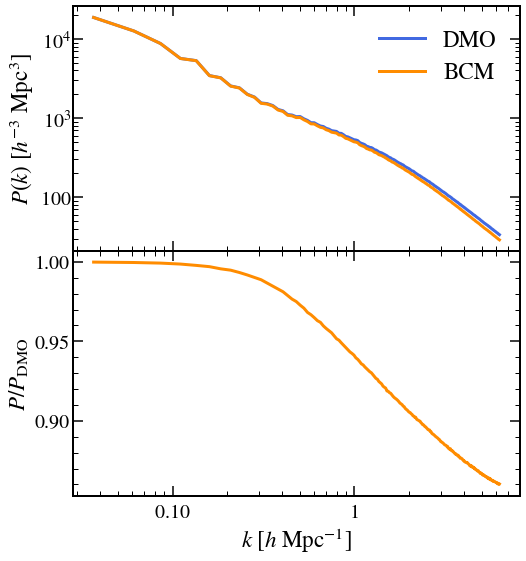

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(8, 9), sharex=True, gridspec_kw={'hspace': 0})

ax[0].loglog(dmopk['k'], dmopk['pk'], lw=3, color='royalblue', label='DMO')
ax[0].loglog(bcmpk['k'], bcmpk['pk'], lw=3, color='darkorange', label='BCM')
ax[0].legend(fontsize=23)

ax[1].semilogx(bcmpk['k'], bcmpk['pk']/dmopk['pk'], lw=3, color='darkorange')

ax[1].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
ax[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, \mathrm{Mpc}^3]$', fontsize=23)
ax[1].set_ylabel(r'$P / P_{\mathrm{DMO}}$', fontsize=23)
bacco.set_logticks(ax[0])
bacco.set_logticks(ax[1], axis='x')

plt.show()

# Measure 15 terms of lbias in DMO and BCM sims

In [8]:
# dumping scale
ds = 0.75

nsdm = int(np.cbrt(sim.header['NpartTotal']) / 4)

print('Number of sdm particles: {}'.format(nsdm))

dmobmodel = bacco.bias_model.BiasModel(sim=sim, ngrid=nsdm,
                                       npart_for_fake_sim=nsdm,
                                       mean_num_dens=0.01, # doesn't matter
                                       mode='sdm', sdm=True,
                                       damping_scale=ds)
dmopij = dmobmodel.compute_power_terms(kmin=kmin, kmax=kmax, nbins=nbins, log_binning=log_binning)

2024-02-03 23:29:52,741 bacco.BiasModel : Initialising Bias Model class ...
2024-02-03 23:29:52,841 bacco.BiasModel : Computing power spectra of bias terms ...
2024-02-03 23:29:52,843 bacco.BiasModel : Memory used: 2.731671552 Gigabytes
2024-02-03 23:29:52,843 bacco.BiasModel : Computing bias model power spectra...
2024-02-03 23:29:52,844 bacco.BiasModel : 0.9990212338420196
2024-02-03 23:29:52,845 bacco.BiasModel : -----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------
2024-02-03 23:29:52,845 bacco.BiasModel : Computing bias terms in lagrangian space and moving to Eulerian ...
2024-02-03 23:29:52,846 bacco.BiasModel : Computi

Number of sdm particles: 192


2024-02-03 23:29:53,437 bacco.BiasModel : fttw freqs
2024-02-03 23:29:53,438 bacco.BiasModel : tidk freqs


bacco.lss_scaler : 288 P(k) values; Di = (0.999481, 0.998948, 0.998444, 0.998444); nthreads =48; seed =-406168 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =-406168 ngrid=192 pkfixed=1 phase=0.000000, phase_type=0; precision=single 


2024-02-03 23:29:53,764 bacco.BiasModel : ifft
2024-02-03 23:29:55,377 bacco.BiasModel : Computing laplacian ...
2024-02-03 23:29:55,379 bacco.BiasModel : Memory used: 3.025424384 Gigabytes
2024-02-03 23:29:55,686 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-02-03 23:29:55,690 bacco.BiasModel : Memory used: 3.065085952 Gigabytes
2024-02-03 23:29:55,695 bacco.BiasModel : Computing delta squared ...
2024-02-03 23:29:55,697 bacco.BiasModel : Memory used: 3.065085952 Gigabytes
2024-02-03 23:29:55,725 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-02-03 23:29:55,726 bacco.BiasModel : Memory used: 3.093262336 Gigabytes
2024-02-03 23:29:56,258 bacco.BiasModel : Transforming to eulerian coords ...
2024-02-03 23:29:56,260 bacco.BiasModel : Memory used: 2.852216832 Gigabytes
2024-02-03 23:29:56,261 bacco.BiasModel : Finding indices from lagrangian neighbours ...
2024-02-03 23:29:56,262 bacco.BiasModel : Memory used: 2.852216832 Gigabytes
20

bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb


2024-02-03 23:30:02,483 bacco.statistics :  mesh done in 0.076 s
2024-02-03 23:30:02,483 bacco.BiasModel : mesh #3
2024-02-03 23:30:02,484 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-03 23:30:02,484 bacco.statistics : starting deposit 1
2024-02-03 23:30:02,547 bacco.statistics :  mesh done in 0.0628 s
2024-02-03 23:30:02,547 bacco.BiasModel : mesh #4
2024-02-03 23:30:02,548 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-03 23:30:02,548 bacco.statistics : starting deposit 1
2024-02-03 23:30:02,627 bacco.statistics :  mesh done in 0.0788 s
2024-02-03 23:30:02,661 bacco.BiasModel : Finished computing bias terms in lagrangian space and moving to Eulerian.
2024-02-03 23:30:02,662 bacco.BiasModel : Defining prod...
2024-02-03 23:30:02,662 bacco.BiasModel : np.arange(bias_terms_eul.shape[0]) = [0 1 2 3 4]


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)


2024-02-03 23:30:05,943 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.147553 sec
bacco.power : Counting modes


2024-02-03 23:30:09,078 bacco.statistics :  ...done in 3.14 s
2024-02-03 23:30:09,110 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.856518 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005785 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 2.21317e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.152930 sec
bacco.power : Counting modes


2024-02-03 23:30:12,117 bacco.statistics :  ...done in 3.01 s
2024-02-03 23:30:12,140 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.765100 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005069 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -4.61179e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.031987 sec
bacco.power : Counting modes


2024-02-03 23:30:14,960 bacco.statistics :  ...done in 2.82 s
2024-02-03 23:30:14,980 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.723252 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005783 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -2.68684e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.182555 sec
bacco.power : Counting modes


2024-02-03 23:30:18,016 bacco.statistics :  ...done in 3.04 s
2024-02-03 23:30:18,040 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.759439 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005623 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -7.4357e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.179190 sec
bacco.power : Counting modes


2024-02-03 23:30:21,157 bacco.statistics :  ...done in 3.12 s
2024-02-03 23:30:21,191 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.867892 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005670 secs
bacco.power : Deallocating arrays


2024-02-03 23:30:24,139 bacco.statistics :  ...done in 2.95 s
2024-02-03 23:30:24,172 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 2.21317e-11 (grid1) 2.21317e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166976 sec
bacco.power : Counting modes
bacco.power : done counting modes in 2.690518 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005791 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 2.21317e-11 (grid1) -4.61179e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.171580 sec
bacco.power : Counting modes


2024-02-03 23:30:27,360 bacco.statistics :  ...done in 3.19 s
2024-02-03 23:30:27,394 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.932229 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.002964 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 2.21317e-11 (grid1) -2.68684e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.182013 sec
bacco.power : Counting modes


2024-02-03 23:30:30,507 bacco.statistics :  ...done in 3.11 s
2024-02-03 23:30:30,541 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.851855 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003933 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 2.21317e-11 (grid1) -7.4357e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166984 sec
bacco.power : Counting modes


2024-02-03 23:30:33,635 bacco.statistics :  ...done in 3.09 s
2024-02-03 23:30:33,657 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.833908 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005456 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.61179e-07 (grid1) -4.61179e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.155280 sec
bacco.power : Counting modes


2024-02-03 23:30:36,615 bacco.statistics :  ...done in 2.96 s
2024-02-03 23:30:36,638 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.703382 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005581 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.61179e-07 (grid1) -2.68684e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.135363 sec
bacco.power : Counting modes


2024-02-03 23:30:39,699 bacco.statistics :  ...done in 3.06 s
2024-02-03 23:30:39,722 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.819927 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005619 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=0 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.61179e-07 (grid1) -7.4357e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.145973 sec
bacco.power : Counting modes


2024-02-03 23:30:42,634 bacco.statistics :  ...done in 2.91 s
2024-02-03 23:30:42,659 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.678186 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005661 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.68684e-07 (grid1) -2.68684e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.160564 sec
bacco.power : Counting modes


2024-02-03 23:30:45,409 bacco.statistics :  ...done in 2.75 s
2024-02-03 23:30:45,429 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.511068 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005710 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.68684e-07 (grid1) -7.4357e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.060873 sec
bacco.power : Counting modes


2024-02-03 23:30:48,220 bacco.statistics :  ...done in 2.79 s
2024-02-03 23:30:48,246 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.636616 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004442 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -7.4357e-11 (grid1) -7.4357e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.152025 sec
bacco.power : Counting modes


2024-02-03 23:30:51,437 bacco.statistics :  ...done in 3.19 s
2024-02-03 23:30:51,439 bacco.BiasModel : Done computing power spectra terms.


bacco.power : done counting modes in 2.846582 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.011680 secs
bacco.power : Deallocating arrays


In [9]:
bcmbmodel = bacco.bias_model.BiasModel(sim=bcmsim.BaryonSimulation, ngrid=nsdm,
                                       npart_for_fake_sim=nsdm,
                                       mean_num_dens=0.01, # doesn't matter
                                       mode='sdm', sdm=True,
                                       damping_scale=ds)
bcmpij = bcmbmodel.compute_power_terms(kmin=kmin, kmax=kmax, nbins=nbins, log_binning=log_binning)

2024-02-03 23:30:51,459 bacco.BiasModel : Initialising Bias Model class ...
2024-02-03 23:30:51,543 bacco.BiasModel : Computing power spectra of bias terms ...
2024-02-03 23:30:51,544 bacco.BiasModel : Memory used: 3.283664896 Gigabytes
2024-02-03 23:30:51,545 bacco.BiasModel : Computing bias model power spectra...
2024-02-03 23:30:51,545 bacco.BiasModel : 0.9990212338420196
2024-02-03 23:30:51,546 bacco.BiasModel : -----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------
2024-02-03 23:30:51,546 bacco.BiasModel : Computing bias terms in lagrangian space and moving to Eulerian ...
2024-02-03 23:30:51,547 bacco.BiasModel : Computi

bacco.lss_scaler : 288 P(k) values; Di = (0.999481, 0.998948, 0.998444, 0.998444); nthreads =48; seed =-406168 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =-406168 ngrid=192 pkfixed=1 phase=0.000000, phase_type=0; precision=single 


2024-02-03 23:31:13,351 bacco.BiasModel : ifft
2024-02-03 23:31:14,982 bacco.BiasModel : Computing laplacian ...
2024-02-03 23:31:14,984 bacco.BiasModel : Memory used: 3.538276352 Gigabytes
2024-02-03 23:31:19,954 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-02-03 23:31:19,959 bacco.BiasModel : Memory used: 3.53859584 Gigabytes
2024-02-03 23:31:19,966 bacco.BiasModel : Computing delta squared ...
2024-02-03 23:31:19,967 bacco.BiasModel : Memory used: 3.53859584 Gigabytes
2024-02-03 23:31:19,997 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-02-03 23:31:19,998 bacco.BiasModel : Memory used: 3.538612224 Gigabytes
2024-02-03 23:31:20,544 bacco.BiasModel : Transforming to eulerian coords ...
2024-02-03 23:31:20,545 bacco.BiasModel : Memory used: 3.425366016 Gigabytes
2024-02-03 23:31:20,546 bacco.BiasModel : Finding indices from lagrangian neighbours ...
2024-02-03 23:31:20,547 bacco.BiasModel : Memory used: 3.425366016 Gigabytes
2024

bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)


2024-02-03 23:31:26,988 bacco.statistics :  mesh done in 0.085 s
2024-02-03 23:31:26,988 bacco.BiasModel : mesh #3
2024-02-03 23:31:26,989 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-03 23:31:26,989 bacco.statistics : starting deposit 1
2024-02-03 23:31:27,070 bacco.statistics :  mesh done in 0.081 s
2024-02-03 23:31:27,070 bacco.BiasModel : mesh #4
2024-02-03 23:31:27,071 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-03 23:31:27,071 bacco.statistics : starting deposit 1
2024-02-03 23:31:27,185 bacco.statistics :  mesh done in 0.114 s


bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)


2024-02-03 23:31:27,215 bacco.BiasModel : Finished computing bias terms in lagrangian space and moving to Eulerian.
2024-02-03 23:31:27,216 bacco.BiasModel : Defining prod...
2024-02-03 23:31:27,217 bacco.BiasModel : np.arange(bias_terms_eul.shape[0]) = [0 1 2 3 4]
2024-02-03 23:31:30,294 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.151680 sec
bacco.power : Counting modes


2024-02-03 23:31:33,503 bacco.statistics :  ...done in 3.21 s
2024-02-03 23:31:33,534 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.887695 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005833 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 4.51311e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.160256 sec
bacco.power : Counting modes


2024-02-03 23:31:36,415 bacco.statistics :  ...done in 2.88 s
2024-02-03 23:31:36,437 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.610424 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006218 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -4.60723e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.144835 sec
bacco.power : Counting modes


2024-02-03 23:31:39,458 bacco.statistics :  ...done in 3.02 s
2024-02-03 23:31:39,487 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.789910 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003642 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -2.6896e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.142619 sec
bacco.power : Counting modes


2024-02-03 23:31:42,344 bacco.statistics :  ...done in 2.86 s
2024-02-03 23:31:42,374 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.630238 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005693 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -4.02339e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.156756 sec
bacco.power : Counting modes


2024-02-03 23:31:45,363 bacco.statistics :  ...done in 2.99 s
2024-02-03 23:31:45,389 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.722788 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005427 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 4.51311e-09 (grid1) 4.51311e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.145377 sec
bacco.power : Counting modes


2024-02-03 23:31:48,378 bacco.statistics :  ...done in 2.99 s
2024-02-03 23:31:48,400 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.766539 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006167 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 4.51311e-09 (grid1) -4.60723e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.143934 sec
bacco.power : Counting modes


2024-02-03 23:31:51,158 bacco.statistics :  ...done in 2.76 s
2024-02-03 23:31:51,187 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.564254 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004080 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 4.51311e-09 (grid1) -2.6896e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.149029 sec
bacco.power : Counting modes


2024-02-03 23:31:53,945 bacco.statistics :  ...done in 2.76 s
2024-02-03 23:31:53,968 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.483697 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005704 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 4.51311e-09 (grid1) -4.02339e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.149125 sec
bacco.power : Counting modes


2024-02-03 23:31:57,036 bacco.statistics :  ...done in 3.07 s
2024-02-03 23:31:57,056 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.835700 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006754 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.60723e-07 (grid1) -4.60723e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.156283 sec
bacco.power : Counting modes


2024-02-03 23:32:00,059 bacco.statistics :  ...done in 3.0 s
2024-02-03 23:32:00,095 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.764257 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005544 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1


2024-02-03 23:32:02,818 bacco.statistics :  ...done in 2.72 s
2024-02-03 23:32:02,858 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : total mass -4.60723e-07 (grid1) -2.6896e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.158716 sec
bacco.power : Counting modes
bacco.power : done counting modes in 2.509220 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005585 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=0 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.60723e-07 (grid1) -4.02339e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.147089 sec
bacco.power : Counting modes


2024-02-03 23:32:05,530 bacco.statistics :  ...done in 2.67 s
2024-02-03 23:32:05,545 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.468280 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005850 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.6896e-07 (grid1) -2.6896e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.131631 sec
bacco.power : Counting modes


2024-02-03 23:32:08,564 bacco.statistics :  ...done in 3.02 s
2024-02-03 23:32:08,609 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.802527 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005658 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.6896e-07 (grid1) -4.02339e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.162621 sec
bacco.power : Counting modes


2024-02-03 23:32:11,379 bacco.statistics :  ...done in 2.77 s
2024-02-03 23:32:11,394 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.542672 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005473 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.02339e-10 (grid1) -4.02339e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.158334 sec
bacco.power : Counting modes


2024-02-03 23:32:14,141 bacco.statistics :  ...done in 2.75 s
2024-02-03 23:32:14,142 bacco.BiasModel : Done computing power spectra terms.


bacco.power : done counting modes in 2.514889 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.002881 secs
bacco.power : Deallocating arrays


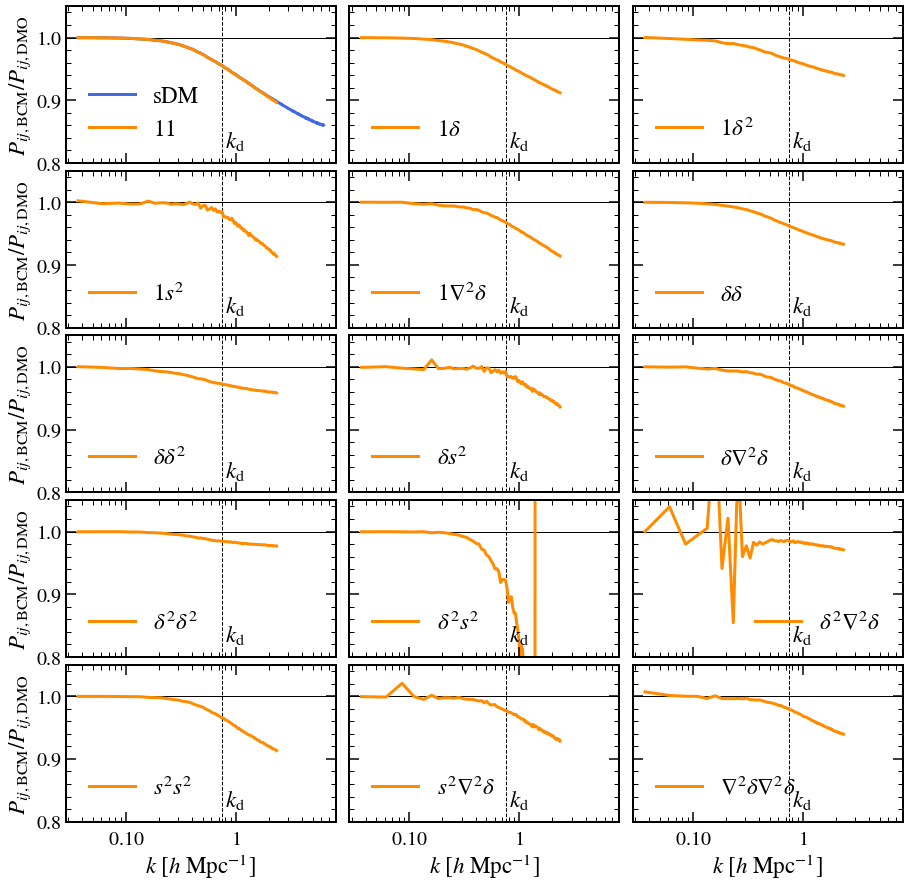

In [10]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

ax = ax.flatten()

labels = [r'$1 1$', r'$1 \delta$', r'$1 \delta^2$', r'$1 s^2$', r'$ 1 \nabla^2\delta$',
          r'$\delta \delta$', r'$\delta \delta^2$', r'$\delta s^2$', r'$\delta \nabla^2\delta$',
          r'$\delta^2 \delta^2$', r'$\delta^2 s^2$', r'$\delta^2 \nabla^2\delta$',  r'$s^2 s^2$',
          r'$s^2 \nabla^2\delta$', r'$\nabla^2\delta \nabla^2\delta$']

for i in range(15):
    ax[i].axhline(1, color='k', lw=1)
    ax[i].axvline(ds, color='k', lw=1, ls='--')
    if i == 0:
        ax[i].semilogx(dmopk['k'], bcmpk['pk'] / dmopk['pk'], lw=3, color='royalblue', label='sDM')
    mask = bcmpij[i]['k'] < np.pi * nsdm / sim.header['BoxSize']
    ax[i].semilogx(bcmpij[i]['k'][mask], bcmpij[i]['pk'][mask] / dmopij[i]['pk'][mask], lw=3, color='darkorange', label=labels[i])
    ax[i].legend(fontsize=23)
    ax[i].set_ylim(0.8, 1.05)
    ax[i].text(ds + 0.05, 0.825, r'$k_{\rm d}$', fontsize=23)
    if i % 3 == 0:
        ax[i].set_ylabel(r'$P_{ij, \mathrm{BCM}} / P_{ij, \mathrm{DMO}}$', fontsize=23)
    if i >= 12:
        ax[i].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
        bacco.set_logticks(ax[i], axis='x')

plt.show()

# Compare combination with same bias parameters but for $b_{\nabla}$
This should indicate if we can absorb the full effect of baryons in the laplacian bias parameter.

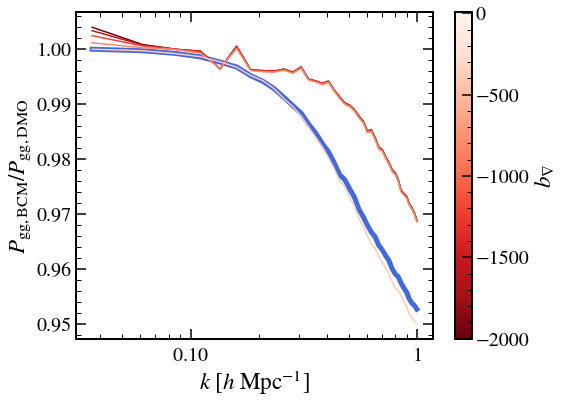

In [11]:
def combine(biasvec, pnn):
    import itertools
    biasvec = np.concatenate([[1], biasvec])
    prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))
    pgg = 0
    for i in range(15):
        fac = 2 if prod[i, 0] != prod[i, 1] else 1
        pgg += fac * biasvec[prod[i, 0]] * biasvec[prod[i, 1]] * pnn[i]['pk']
    return pgg

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

biases = [1, 0.2, 0.2, 1]
dmopgg = combine(biases, dmopij)
bcmpgg = combine(biases, bcmpij)
k = dmopij[0]['k']

mask = k < 1
ax.semilogx(k[mask], bcmpgg[mask] / dmopgg[mask], lw=5, color='royalblue')

blaps = np.linspace(-2000, 5, 5)
for ib, blap in enumerate(blaps):
    biases = [1, 0.2, 0.2, blap]
    dmopgg = combine(biases, dmopij)
    bcmpgg = combine(biases, bcmpij)
    k = dmopij[0]['k']

    cc = plt.cm.Reds_r(ib / len(blaps))
    mask = k < 1
    ax.semilogx(k[mask], bcmpgg[mask] / dmopgg[mask], lw=1.5, color=cc)

ax.set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P_{\rm gg, \mathrm{BCM}} / P_{\rm gg, \mathrm{DMO}}$', fontsize=23)
bacco.set_logticks(ax, axis='x')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-2000, vmax=5), cmap=plt.cm.Reds_r), ax=ax)
cb.ax.set_ylabel(r'$b_{\nabla}$', fontsize=23)

plt.show()

In [ ]:
import pickle
data = {'dmopij': dmopij, 'bcmpij': bcmpij}
with open('pij.pickle', 'wb') as f:
    pickle.dump(data, f)